In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.optimizers import Adam

In [2]:
# 데이터 로드
df = pd.read_csv('data/cars.csv', index_col = 'Unnamed: 0')

In [4]:
df.head()

,speed,dist
1,4,2
2,4,10
3,7,4
4,7,22
5,8,16


In [9]:
X_data = df.iloc[:,0].values
y_data = df.iloc[:,1].values

In [10]:
X_data

array([ 4,  4,  7,  7,  8,  9, 10, 10, 10, 11, 11, 12, 12, 12, 12, 13, 13,
       13, 13, 14, 14, 14, 14, 15, 15, 15, 16, 16, 17, 17, 17, 18, 18, 18,
       18, 19, 19, 19, 20, 20, 20, 20, 20, 22, 23, 24, 24, 24, 24, 25],
      dtype=int64)

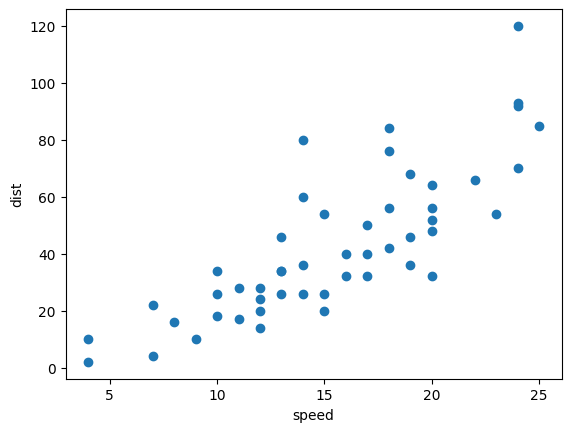

In [12]:
# 시각화
plt.scatter(X_data, y_data)

plt.xlabel('speed')
plt.ylabel('dist')

plt.show()

In [13]:
x = tf.constant(X_data, tf.float32)
y = tf.constant(y_data, tf.float32)
w = tf.Variable(tf.random.uniform([1]))
b = tf.Variable(tf.random.uniform([1]))

In [14]:
def compute_cost():
    hx = w*x+b
    c = tf.reduce_mean((hx-y)**2)
    return c

In [17]:
optimizer = Adam(learning_rate = 0.01)
hist_cost = []
for i in range(2000):
    optimizer.minimize(compute_cost, var_list = [w,b])
    c = compute_cost().numpy()
    hist_cost.append(c)
    print(i, 'cost=', c)

0 cost= 1897.7222
1 cost= 1883.8657
2 cost= 1870.0713
3 cost= 1856.3397
4 cost= 1842.672
5 cost= 1829.0693
6 cost= 1815.532
7 cost= 1802.0615
8 cost= 1788.6587
9 cost= 1775.3243
10 cost= 1762.059
11 cost= 1748.864
12 cost= 1735.7397
13 cost= 1722.6869
14 cost= 1709.7064
15 cost= 1696.7987
16 cost= 1683.9644
17 cost= 1671.2046
18 cost= 1658.5189
19 cost= 1645.9084
20 cost= 1633.3738
21 cost= 1620.9152
22 cost= 1608.5328
23 cost= 1596.2273
24 cost= 1583.9989
25 cost= 1571.848
26 cost= 1559.7747
27 cost= 1547.7794
28 cost= 1535.8618
29 cost= 1524.0228
30 cost= 1512.2621
31 cost= 1500.5797
32 cost= 1488.976
33 cost= 1477.4508
34 cost= 1466.0044
35 cost= 1454.6364
36 cost= 1443.3472
37 cost= 1432.1364
38 cost= 1421.0043
39 cost= 1409.9503
40 cost= 1398.9747
41 cost= 1388.0775
42 cost= 1377.2579
43 cost= 1366.5167
44 cost= 1355.853
45 cost= 1345.2668
46 cost= 1334.7579
47 cost= 1324.3263
48 cost= 1313.9717
49 cost= 1303.6936
50 cost= 1293.4921
51 cost= 1283.3667
52 cost= 1273.3174
53 cost= 1

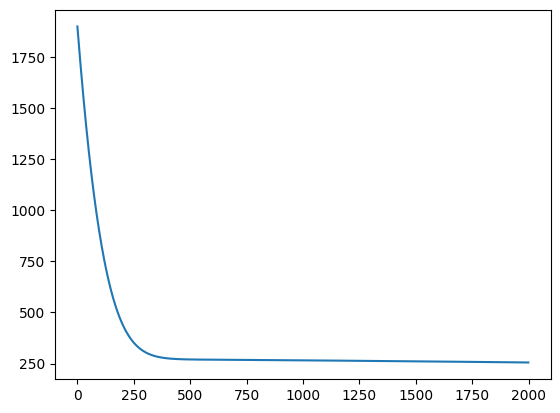

In [19]:
plt.plot(hist_cost)
plt.show()

In [ ]:
### 자동차 속도가 10, 15인 경우 제동거리를 예측하시오

In [24]:
def hxFn(xdata):
    hx = w*xdata+b
    return hx.numpy()

In [25]:
hxFn(10)

array([28.578657], dtype=float32)

In [26]:
w

<tf.Variable 'Variable:0' shape=(1,) dtype=float32, numpy=array([2.9654253], dtype=float32)>

In [35]:
a = []
for i in range(len(y)):
    a.append(hxFn(x[i]))

In [36]:
## 라인, scatter
## 팀별 스터디

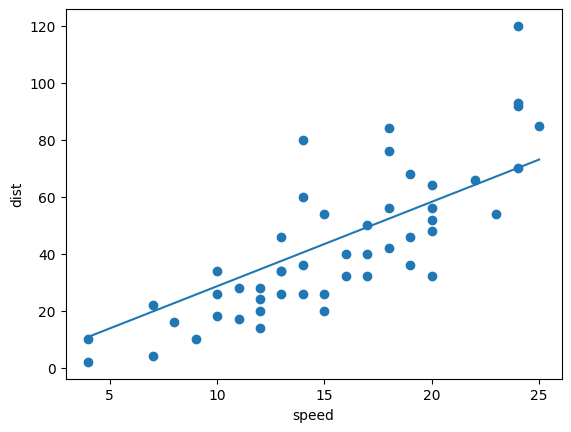

In [37]:
# 시각화
plt.scatter(x, y)
plt.plot(x, a)
plt.xlabel('speed')
plt.ylabel('dist')

plt.show()

In [41]:
y_mean = tf.reduce_mean(y)

In [42]:
tf.reduce_sum((hxFn(x) - y_mean)**2) / tf.reduce_sum((y - y_mean)**2)

<tf.Tensor: shape=(), dtype=float32, numpy=0.37423885>

In [44]:
## 검증 : 결정계수를 통해서
from sklearn.metrics import r2_score
r2_score(y, hxFn(x))

0.6077175766661188